In [1]:
import requests
import os
from bs4 import BeautifulSoup

In [120]:
url='https://www.nykaa.com/minimalist-2percent-salicylic-acid-lha-face-cleanser-for-oil-control-acne/reviews/1467106?skuId=1467106&ptype=reviews'

In [121]:
! pip install lxml

In [122]:
data=requests.get(url).text

In [123]:
data

'<!doctype html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=5.0"/><meta name="theme-color" content="#fff"/><meta name="author" content="NykaaFrontendTeam"/><link rel="icon" href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" type="image/x-icon"/><link rel="canonical" href="https://www.nykaa.com/minimalist-2percent-salicylic-acid-lha-face-cleanser-for-oil-control-acne/reviews/1467106"/><title data-react-helmet="true">Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne: Buy Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne Online at Best Price in India | Nykaa</title><meta data-react-helmet="true" property="og:title" content="Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne: Buy Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne Online at Best Pric

In [124]:
soup=BeautifulSoup(data,'lxml')

In [125]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,maximum-scale=5.0" name="viewport"/><meta content="#fff" name="theme-color"/><meta content="NykaaFrontendTeam" name="author"/><link href="//images-static.nykaa.com/media/favicon/default/nykaa_favicon_a.png" rel="icon" type="image/x-icon"/><link href="https://www.nykaa.com/minimalist-2percent-salicylic-acid-lha-face-cleanser-for-oil-control-acne/reviews/1467106" rel="canonical"/><title data-react-helmet="true">Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne: Buy Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne Online at Best Price in India | Nykaa</title><meta content="Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne: Buy Minimalist 2% Salicylic Acid + LHA Face Wash With Zinc For Reducing Sebum &amp; Acne Online at Best Price in India | Nykaa" data-react-helmet="true" 

In [126]:
reviews=soup.find('div',class_='css-17i1bd7 e1767jz00')

In [ ]:
headline=soup.find_all('h4',class_='css-tm4hnq')

In [ ]:
headline

In [ ]:
tit=[]
for x in headline:
    a=x.text
    tit.append(a)
    

In [ ]:
tit

In [ ]:
reviews_all=soup.find_all('p',class_='css-1n0nrdk')
reviews_all

In [ ]:
rev_all=[]
for y in reviews_all:
    b=y.text
    rev_all.append(b)

In [ ]:
rev_all

In [ ]:
len(rev_all)

In [128]:
len(tit)

21

In [129]:
import pandas as pd

In [130]:
df=pd.DataFrame()

In [131]:
df['title']=tit
df['review']=rev_all

In [132]:
df.head()

,title,review
0,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
1,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
2,"""Good for acne prone skin """,Loved the quality of this product. Not harsh o...
3,"""Good""",A new product I'm very happy with controls the...
4,"""Worth it""",Its a good cleanser and mild exfoliator. I am ...


In [133]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [134]:
df1=df.copy()
df1.head()

,title,review
0,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
1,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
2,"""Good for acne prone skin """,Loved the quality of this product. Not harsh o...
3,"""Good""",A new product I'm very happy with controls the...
4,"""Worth it""",Its a good cleanser and mild exfoliator. I am ...


# Removing accented characters and special characters

In [135]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [136]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [137]:
df1['title']=df1['title'].apply(remove_accented_chars).apply(remove_special_characters)

In [138]:
df1['review']=df1['review'].apply(remove_accented_chars).apply(remove_special_characters)

In [139]:
df1.head()

,title,review
0,Revolution in skin care,THE best of the bests I have ever came across ...
1,Revolution in skin care,THE best of the bests I have ever came across ...
2,Good for acne prone skin,Loved the quality of this product Not harsh on...
3,Good,A new product Im very happy with controls the ...
4,Worth it,Its a good cleanser and mild exfoliator I am u...


# Stemming into root words

In [140]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [141]:
df1['review']=df1['review'].apply(simple_stemmer)

In [142]:
df1['title']=df1['title'].apply(simple_stemmer)

In [143]:
df1.head()

,title,review
0,revolut in skin care,the best of the best i have ever came across t...
1,revolut in skin care,the best of the best i have ever came across t...
2,good for acn prone skin,love the qualiti of thi product not harsh on s...
3,good,a new product im veri happi with control the o...
4,worth it,it a good cleanser and mild exfoli i am use it...


# Removing stop words

In [144]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [146]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [147]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [148]:
df1['review']=df1['review'].apply(remove_stopwords)

In [149]:
df1['title']=df1['title'].apply(remove_stopwords)

In [150]:
df1.head()

,title,review
0,revolut skin care,best best ever came across thi definit mark ni...
1,revolut skin care,best best ever came across thi definit mark ni...
2,good acn prone skin,love qualiti thi product not harsh skin fragra...
3,good,new product im veri happi control oil acn inne...
4,worth,good cleanser mild exfoli use sinc 1 month red...


# Sentiment analysis 

In [151]:
from afinn import Afinn

In [152]:
af=Afinn()

In [153]:
sent_score=[af.score(x) for x in df1['review']]

In [154]:
sent_score

[6.0,
 6.0,
 4.0,
 2.0,
 7.0,
 1.0,
 4.0,
 -1.0,
 6.0,
 -1.0,
 6.0,
 3.0,
 7.0,
 1.0,
 3.0,
 0.0,
 3.0,
 0.0,
 4.0,
 3.0,
 6.0]

In [155]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sent_score]

In [156]:
sentiment_category

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive']

In [157]:
df1['sent_score']=sent_score

In [158]:
df1['sent_cat']=sentiment_category

In [159]:
df1.head()

,title,review,sent_score,sent_cat
0,revolut skin care,best best ever came across thi definit mark ni...,6.0,positive
1,revolut skin care,best best ever came across thi definit mark ni...,6.0,positive
2,good acn prone skin,love qualiti thi product not harsh skin fragra...,4.0,positive
3,good,new product im veri happi control oil acn inne...,2.0,positive
4,worth,good cleanser mild exfoli use sinc 1 month red...,7.0,positive


In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
df1['sent_cat'].value_counts()

positive    17
negative     2
neutral      2
Name: sent_cat, dtype: int64

<AxesSubplot:>

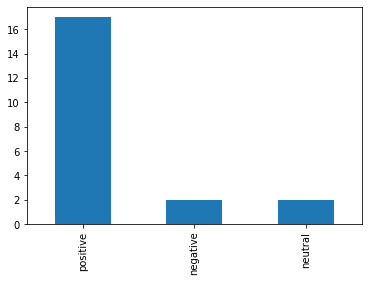

In [162]:
df1['sent_cat'].value_counts().plot(kind='bar')

# With infinite scrolling

In [3]:
! pip install selenium

In [7]:
import time

In [8]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.nykaa.com/minimalist-2percent-salicylic-acid-lha-face-cleanser-for-oil-control-acne/reviews/1467106?skuId=1467106&ptype=reviews')

scroll_pause_time = 2

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(scroll_pause_time)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [9]:
soupp=BeautifulSoup(driver.page_source,'lxml')

In [10]:
headline_all=soupp.find_all('h4',class_='css-tm4hnq')

In [13]:
tit_all=[]
for x in headline_all:
    a=x.text
    tit_all.append(a)
    

In [14]:
tit_all[:5]

['"Revolution in skin care!! "',
 '"Revolution in skin care!! "',
 '"Good for acne prone skin "',
 '"Good"',
 '"Worth it"']

In [16]:
reviews_all=soupp.find_all('p',class_='css-1n0nrdk')
reviews_all[:5]

[<p class="css-1n0nrdk">THE best of the bests I have ever came across to 🙂 This will definitely mark a niche in yhe skincare Industry as the results are beyond expected.  Must buy!!! </p>,
 <p class="css-1n0nrdk">THE best of the bests I have ever came across to 🙂 This will definitely mark a niche in yhe skincare Industry as the results are beyond expected.  Must buy!!! </p>,
 <p class="css-1n0nrdk">Loved the quality of this product. Not harsh on skin. Fragrance free. Worth it.</p>,
 <p class="css-1n0nrdk">A new product I'm very happy with controls the oil and acne. The inner packaging is very cute!</p>,
 <p class="css-1n0nrdk">Its a good cleanser and mild exfoliator. I am using it since 1 month. It reduces my acne breakout and also keep my skin oil free. Still using it for best result. I also use m<strong>...Read More</strong></p>]

In [17]:
rev_all=[]
for y in reviews_all:
    b=y.text
    rev_all.append(b)

In [18]:
rev_all[:5]

['THE best of the bests I have ever came across to 🙂 This will definitely mark a niche in yhe skincare Industry as the results are beyond expected.  Must buy!!! ',
 'THE best of the bests I have ever came across to 🙂 This will definitely mark a niche in yhe skincare Industry as the results are beyond expected.  Must buy!!! ',
 'Loved the quality of this product. Not harsh on skin. Fragrance free. Worth it.',
 "A new product I'm very happy with controls the oil and acne. The inner packaging is very cute!",
 'Its a good cleanser and mild exfoliator. I am using it since 1 month. It reduces my acne breakout and also keep my skin oil free. Still using it for best result. I also use m...Read More']

In [19]:
len(rev_all)

61

In [20]:
import pandas as pd

In [21]:
df_all=pd.DataFrame()

In [22]:
df_all['title']=tit_all

In [23]:
df_all['reviews']=rev_all

In [24]:
df_all.head()

,title,reviews
0,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
1,"""Revolution in skin care!! """,THE best of the bests I have ever came across ...
2,"""Good for acne prone skin """,Loved the quality of this product. Not harsh o...
3,"""Good""",A new product I'm very happy with controls the...
4,"""Worth it""",Its a good cleanser and mild exfoliator. I am ...


In [25]:
df_all.shape

(61, 2)

In [26]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

# Removing unwanted special characters and accented texts

In [27]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [28]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [31]:
df_all['title']=df_all['title'].apply(remove_accented_chars).apply(remove_special_characters)
df_all['reviews']=df_all['reviews'].apply(remove_accented_chars).apply(remove_special_characters)
df_all.head()

,title,reviews
0,Revolution in skin care,THE best of the bests I have ever came across ...
1,Revolution in skin care,THE best of the bests I have ever came across ...
2,Good for acne prone skin,Loved the quality of this product Not harsh on...
3,Good,A new product Im very happy with controls the ...
4,Worth it,Its a good cleanser and mild exfoliator I am u...


# Stemming

In [32]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [33]:
df_all['title']=df_all['title'].apply(simple_stemmer)
df_all['reviews']=df_all['reviews'].apply(simple_stemmer)
df_all.head()

,title,reviews
0,revolut in skin care,the best of the best i have ever came across t...
1,revolut in skin care,the best of the best i have ever came across t...
2,good for acn prone skin,love the qualiti of thi product not harsh on s...
3,good,a new product im veri happi with control the o...
4,worth it,it a good cleanser and mild exfoli i am use it...


# Remove stopwords

In [34]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [36]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [37]:
df_all['title']=df_all['title'].apply(remove_stopwords)
df_all['reviews']=df_all['reviews'].apply(remove_stopwords)
df_all.head()

,title,reviews
0,revolut skin care,best best ever came across thi definit mark ni...
1,revolut skin care,best best ever came across thi definit mark ni...
2,good acn prone skin,love qualiti thi product not harsh skin fragra...
3,good,new product im veri happi control oil acn inne...
4,worth,good cleanser mild exfoli use sinc 1 month red...


# Sentiment analysis

In [38]:
from afinn import Afinn

In [39]:
afi=Afinn()

In [41]:
sent_score=[afi.score(x) for x in df_all['reviews']]

In [42]:
sent_score[:5]

[6.0, 6.0, 4.0, 2.0, 7.0]

In [43]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sent_score]

In [44]:
sentiment_category[:5]

['positive', 'positive', 'positive', 'positive', 'positive']

In [45]:
df_all['sent_score']=sent_score
df_all['sent_cat']=sentiment_category

In [46]:
df_all.head()

,title,reviews,sent_score,sent_cat
0,revolut skin care,best best ever came across thi definit mark ni...,6.0,positive
1,revolut skin care,best best ever came across thi definit mark ni...,6.0,positive
2,good acn prone skin,love qualiti thi product not harsh skin fragra...,4.0,positive
3,good,new product im veri happi control oil acn inne...,2.0,positive
4,worth,good cleanser mild exfoli use sinc 1 month red...,7.0,positive


In [47]:
df_all['sent_cat'].value_counts()

positive    50
neutral      8
negative     3
Name: sent_cat, dtype: int64

In [48]:
import matplotlib.pyplot as plt

<AxesSubplot:>

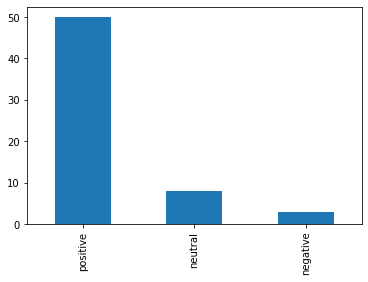

In [49]:
df_all['sent_cat'].value_counts().plot(kind='bar')